### MNIST dataset prediction via deep learning

the MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. 

it is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

it is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.

https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594

#### 1. import data

In [138]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import itertools

In [2]:
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 2. look at the first 9 numbers / pictures from the dataset

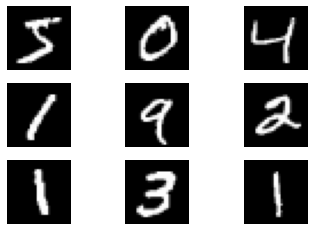

In [6]:
for i in np.arange(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

#### 3. MLP model - simple neural network using keras

Build a simple neural network (a.k.a Multi-layer Perceptron) to classify MNIST digits dataset

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [8]:
# fix random seed for reproducibility

seed = 88
np.random.seed(seed)

In [9]:
# flatten 28*28 images to a 784 vector for each image
# basically make 2D into 1D

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [10]:
# normalize inputs from 0-255 to 0-1
# combine 28 x 28 pixels to 784 - give new shape
# testing 60000
# training 10000

X_train = X_train / 255
X_test = X_test / 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [11]:
# one hot encode outputs

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1] # y_test.shape = 10000,10

In [12]:
# build the model
# create model

model1 = Sequential()
model1.add(Dense(num_pixels, input_shape=(num_pixels,), 
                 kernel_initializer='normal', activation='relu'))
model1.add(Dense(num_classes, 
                 kernel_initializer='normal', activation='softmax'))

In [13]:
# compile model
# optimizer = sgd?

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# fit/train the model
# verbose = 1?
# epoch = 20?

model1.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=15, 
          batch_size=200, 
          verbose=2)

Epoch 1/15
300/300 - 1s - loss: 0.2770 - accuracy: 0.9232 - val_loss: 0.1372 - val_accuracy: 0.9595
Epoch 2/15
300/300 - 1s - loss: 0.1111 - accuracy: 0.9681 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 3/15
300/300 - 1s - loss: 0.0713 - accuracy: 0.9793 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 4/15
300/300 - 1s - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0750 - val_accuracy: 0.9765
Epoch 5/15
300/300 - 1s - loss: 0.0369 - accuracy: 0.9892 - val_loss: 0.0631 - val_accuracy: 0.9798
Epoch 6/15
300/300 - 1s - loss: 0.0261 - accuracy: 0.9927 - val_loss: 0.0560 - val_accuracy: 0.9812
Epoch 7/15
300/300 - 1s - loss: 0.0189 - accuracy: 0.9956 - val_loss: 0.0584 - val_accuracy: 0.9818
Epoch 8/15
300/300 - 1s - loss: 0.0142 - accuracy: 0.9967 - val_loss: 0.0564 - val_accuracy: 0.9816
Epoch 9/15
300/300 - 1s - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0616 - val_accuracy: 0.9804
Epoch 10/15
300/300 - 1s - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0567 - val_accuracy: 0.9819

In [16]:
# evaluation of the model
# verbose = 1?

scores1 = model1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', scores1[0]) # loss 
print('Test accuracy:', scores1[1]) # accuracy
print("Baseline Error: %.2f%%" % (100-scores1[1]*100))

Test score: 0.06052868813276291
Test accuracy: 0.9825999736785889
Baseline Error: 1.74%


this means 9779 predicted correctly out of 10000 samples <br>
this means 221 predicted incorrectly

In [17]:
model.metrics_names # for test score, test accuracy

['loss', 'accuracy']

In [18]:
print("\nModel Summary")
print(model.summary())


Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


inspect correct and incorrect predictions (4 each)

In [19]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
correct_num = np.nonzero(predicted_classes == y_test)[0]
incorrect_num = np.nonzero(predicted_classes != y_test)[0]

In [20]:
correct_num

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

In [21]:
len(correct_num)

9826

In [22]:
len(incorrect_num)

174

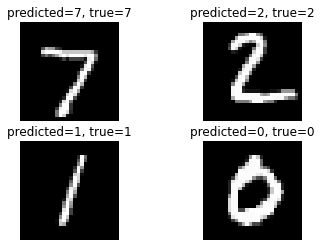

In [23]:
for i, correct in enumerate(correct_num[:4]):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("predicted={}, true={}".format(predicted_classes[correct], y_test[correct]))
    plt.axis("off")

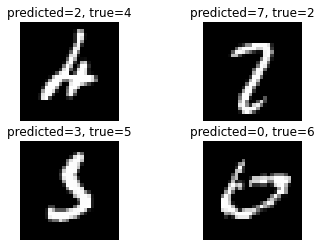

In [24]:
for i, incorrect in enumerate(incorrect_num[:4]):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("predicted={}, true={}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis("off")

#### 4. Convolutional Neural Network (using the default image format)

In [25]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K

In [26]:
# fix random seed for reproducibility

seed = 1
np.random.seed(seed)

In [104]:
# load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [105]:
# data preprocessing

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)

channels_last


In [106]:
# normalize inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]

In [107]:
# build the model
# create model

model2 = Sequential()
model2.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

In [108]:
# Compile model

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
# Fit the model

model2.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=10, 
          batch_size=200, 
          verbose=2)

Epoch 1/10
300/300 - 12s - loss: 0.2378 - accuracy: 0.9306 - val_loss: 0.0744 - val_accuracy: 0.9769
Epoch 2/10
300/300 - 11s - loss: 0.0750 - accuracy: 0.9780 - val_loss: 0.0560 - val_accuracy: 0.9816
Epoch 3/10
300/300 - 11s - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0400 - val_accuracy: 0.9873
Epoch 4/10
300/300 - 11s - loss: 0.0421 - accuracy: 0.9875 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 5/10
300/300 - 11s - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0366 - val_accuracy: 0.9891
Epoch 6/10
300/300 - 11s - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0396 - val_accuracy: 0.9871
Epoch 7/10
300/300 - 11s - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0352 - val_accuracy: 0.9885
Epoch 8/10
300/300 - 12s - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0344 - val_accuracy: 0.9886
Epoch 9/10
300/300 - 11s - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0324 - val_accuracy: 0.9897
Epoch 10/10
300/300 - 11s - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0306 - val_accura

In [110]:
scores2 = model2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', scores2[0]) # loss 
print('Test accuracy:', scores2[1]) # accuracy
print("CNN Error: %.2f%%" % (100-scores2[1]*100))

Test score: 0.03059883415699005
Test accuracy: 0.9897000193595886
CNN Error: 1.03%


In [111]:
print("\nModel Summary")
print(model.summary())


Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________
None


#### 5. Recurrent Neural Network (LSTM)

In [35]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

In [36]:
# load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [38]:
# construct model

model3 = Sequential()
model3.add(LSTM(128, input_shape=(28, 28)))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

In [39]:
# compile model

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [40]:
# fit model 
model3.fit(X_train, y_train, 
          batch_size=128, 
          epochs=10, 
          verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 0.6751 - accuracy: 0.7776 - val_loss: 0.2667 - val_accuracy: 0.9165
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1999 - accuracy: 0.9420 - val_loss: 0.1606 - val_accuracy: 0.9480
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1270 - accuracy: 0.9629 - val_loss: 0.1072 - val_accuracy: 0.9678
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0965 - accuracy: 0.9727 - val_loss: 0.0927 - val_accuracy: 0.9717
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0769 - accuracy: 0.9781 - val_loss: 0.0642 - val_accuracy: 0.9806
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0641 - accuracy: 0.9818 - val_loss: 0.0626 - val_accuracy: 0.9814
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0557 - accuracy: 0.9839 - val_loss: 0.0538 - val_accuracy:

In [41]:
scores3 = model3.evaluate(X_test, y_test, verbose=0)
print('Test score:', scores3[0]) # loss 
print('Test accuracy:', scores3[1]) # accuracy
print("CNN Error: %.2f%%" % (100-scores3[1]*100))

Test score: 0.05995393171906471
Test accuracy: 0.9818999767303467
CNN Error: 1.81%


In [42]:
print("\nModel Summary")
print(model.summary())


Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________
None


#### 6. Evaluate best model

In [46]:
print('MLP model accuracy: {}'.format(round(scores1[1],4)))
print('CNN model accuracy: {}'.format(round(scores2[1],4)))
print('RNN model accuracy: {}'.format(round(scores3[1],4)))

MLP model accuracy: 0.9826
CNN model accuracy: 0.9896
RNN model accuracy: 0.9819


#### 7. Hyperparameters using cross-validation for best model - CNN

one parameter / multiple parameters

We give the model the following hyperparameter search space:

Grid search <br>
optimizers = ['rmsprop', 'adam'] <br>
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'] <br>
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal'] <br>
#batch_size = [10, 20, 40, 60, 80, 100] <br>
#epochs = [10, 20, 30, 50, 75, 100] <br>
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid'] <br>
dense_layer_sizes =  [32, 512] <br>
filters = [32] <br>
kernel_size = [3] <br>
pool_size = [2] <br>

#### 7a. single parameter

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [86]:
seed = 1
np.random.seed(seed)

In [87]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
inputShape = (28,28,1)

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [59]:
# try different optimizer

In [88]:
# create function for model build and model compile

def create_model_one(optimizer):
    print ("optimizer : ", optimizer)

    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    model.summary()
    
    return model

In [89]:
model_clf1 = KerasClassifier(create_model_one, batch_size=200)

optimizers = ['rmsprop', 'adam', 'sgd']
epochs = [10]
verboses = [1]
param_grid1 = dict(optimizer=optimizers, 
                   epoch=epochs,
                   verbose=verboses)

grid_clf1 = GridSearchCV(model_clf1,
                        param_grid=param_grid1,
                        scoring='neg_log_loss',
                        n_jobs=1)

grid_clf1.fit(X_train, Y_train)
print('The parameters of the best model are: ')
print(grid_clf1.best_params_)

optimizer :  rmsprop
Model: "sequential_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_145 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_144 (Flatten)        (None, 4608)              0         
_________________________________________________________________
dense_291 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_292 (Dense)            (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________

1500/1500 [==============================] - 11s 7ms/step - loss: 0.1573 - accuracy: 0.9538
optimizer :  adam
Model: "sequential_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_151 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_152 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_151 (Flatten)        (None, 4608)              0         
_________________________________________________________________
dense_305 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_306 (Dense)            (None, 10)                1290      
Total pa

1500/1500 [==============================] - 10s 7ms/step - loss: 0.5121 - accuracy: 0.8557
optimizer :  sgd
Model: "sequential_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_158 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_158 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_159 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_158 (Flatten)        (None, 4608)              0         
_________________________________________________________________
dense_319 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_320 (Dense)            (None, 10)                1290      
Total par

In [90]:
best_clf = grid_clf.best_estimator_.model

metric_names = best_clf.metrics_names
metric_values = best_clf.evaluate(X_test, y_test)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

313/313 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9818: 0s - loss: 0.0753 - accu
loss :  0.0555364154279232
accuracy :  0.9818000197410583


#### 7b. multiple parameters

because using gridsearchcv takes too much time, <br>
will use randomizedsearchcv instead.

instead of using 'rmsprop' which is recommended as above, <br>
we will use 'adam' optimizer which has better accuracy in the earlier example.

In [74]:
seed = 1
np.random.seed(seed)

In [92]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
inputShape = (28,28,1)

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# this time create different parameters
# use optimizer=adam
# different epoch, different dense layer, different pool size

In [93]:
# create function for model build and model compile

def create_model_many(dense_layer, pool_size):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(dense_layer, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    return model

In [95]:
model_clf2 = KerasClassifier(create_model_many, batch_size=32)

epochs = [10, 20]
dense_layers = [32, 128, 512]
pool_sizes = [1, 2]
verboses = [1]

param_grid2 = dict(epochs=epochs,
                  dense_layer=dense_layers,
                  pool_size=pool_sizes,
                  verbose=verboses)

grid_clf2 = RandomizedSearchCV(model_clf2,
                               param_distributions=param_grid2,
                               scoring='neg_log_loss',
                               n_jobs=1)

grid_clf2.fit(X_train, Y_train)
print('The parameters of the best model are: ')
print(grid_clf2.best_params_)

Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_160 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_160 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_161 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_160 (Flatten)        (None, 18432)             0         
_________________________________________________________________
dense_323 (Dense)            (None, 32)                589856    
_________________________________________________________________
dense_324 (Dense)            (None, 10)                330       
Total params: 591,018
Trainable params: 591,018
Non-trainable params: 0
______________________________________________

1500/1500 [==============================] - 17s 12ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 6/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 7/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0131 - accuracy: 0.9960
Epoch 8/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 9/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 10/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 11/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 12/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 13/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 14/20
1500/1500 [==============================] - 19s 12ms/step 

1500/1500 [==============================] - 19s 12ms/step - loss: 0.0052 - accuracy: 0.9985
Epoch 20/20
375/375 [==============================] - 1s 2ms/step
Model: "sequential_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_165 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_166 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_165 (Flatten)        (None, 4608)              0         
_________________________________________________________________
dense_333 (Dense)            (None, 32)                147488    
_________________________________________________________________
dense_334 (Dense)       

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0530 - accuracy: 0.9832
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0420 - accuracy: 0.9866
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0337 - accuracy: 0.9893
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0286 - accuracy: 0.9905
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 8/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 9/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0179 - accuracy: 0.9941: 0s - loss: 0.0176 - accu
Epoch 10/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0163 - accuracy: 0.9940
Epoch 11/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 12/20
1500/1500 [==============================] - 8s 6ms/s

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0079 - accuracy: 0.9971
Epoch 19/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0064 - accuracy: 0.9977
Epoch 20/20
375/375 [==============================] - 1s 2ms/step
Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_170 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_170 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_171 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_170 (Flatten)        (None, 18432)             0         
_________________________________________________________________
dense_343 (Dense)            (None, 128)               

1500/1500 [==============================] - 28s 18ms/step - loss: 0.1319 - accuracy: 0.95990s - loss: 0.1323 - accuracy: 
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0468 - accuracy: 0.9855
Epoch 3/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0280 - accuracy: 0.9906
Epoch 4/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 5/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0132 - accuracy: 0.9954
Epoch 6/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0088 - accuracy: 0.9968
Epoch 8/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 9/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 10/10
375/375 [========================

1500/1500 [==============================] - 68s 45ms/step - loss: 0.0248 - accuracy: 0.9917
Epoch 4/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0158 - accuracy: 0.9947
Epoch 5/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 6/20
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 7/20
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 8/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 9/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0040 - accuracy: 0.9985
Epoch 10/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 11/20
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 12/20
1500/1500 [==============================] - 68s 45ms/step - 

1500/1500 [==============================] - 69s 46ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 18/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 19/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 20/20
375/375 [==============================] - 2s 6ms/step
Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_179 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_179 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_180 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_179 (Flatten)        (None, 18432)             0         
____________

375/375 [==============================] - 1s 2ms/step
Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_182 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_182 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_183 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_182 (Flatten)        (None, 4608)              0         
_________________________________________________________________
dense_367 (Dense)            (None, 32)                147488    
_________________________________________________________________
dense_368 (Dense)            (None, 10)                330       
Total params: 148,650
Trainable params: 148,650
Non-trainable p

1500/1500 [==============================] - 28s 19ms/step - loss: 0.0264 - accuracy: 0.9911
Epoch 4/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 5/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0131 - accuracy: 0.9954
Epoch 6/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 7/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 8/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 9/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 10/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 11/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 12/20
1500/1500 [==============================] - 26s 17ms/step - 

1500/1500 [==============================] - 26s 17ms/step - loss: 0.0034 - accuracy: 0.9987
Epoch 18/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 19/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0026 - accuracy: 0.9992
Epoch 20/20
375/375 [==============================] - 1s 3ms/step
Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_188 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_188 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_189 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_188 (Flatten)        (None, 18432)             0         
____________

1500/1500 [==============================] - 16s 11ms/step - loss: 0.1770 - accuracy: 0.9475
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0647 - accuracy: 0.9795
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0429 - accuracy: 0.9865
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0297 - accuracy: 0.9903
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0152 - accuracy: 0.9950
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0126 - accuracy: 0.9957
Epoch 8/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 9/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 10/10
375/375 [==============================] - 1s 2ms/step
Model: "

1500/1500 [==============================] - 17s 12ms/step - loss: 0.1875 - accuracy: 0.9432
Epoch 2/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0634 - accuracy: 0.9804
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0424 - accuracy: 0.9868
Epoch 4/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0289 - accuracy: 0.9906
Epoch 5/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 6/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 7/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 8/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0108 - accuracy: 0.9962
Epoch 9/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 10/10
375/375 [==============================] - 1s 2ms/step
Model: "

1500/1500 [==============================] - 10s 7ms/step - loss: 0.1567 - accuracy: 0.9530
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0522 - accuracy: 0.9838
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0359 - accuracy: 0.9885
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0215 - accuracy: 0.9925
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0119 - accuracy: 0.9959 0s - loss: 0.0118 - accuracy: 0.
Epoch 8/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0114 - accuracy: 0.9961
Epoch 9/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 10/20
1500/1500 [============================

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 17/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0056 - accuracy: 0.9980
Epoch 18/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0048 - accuracy: 0.9983
Epoch 19/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 20/20
375/375 [==============================] - 1s 2ms/step
Model: "sequential_202"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_200 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_200 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_201 (Dropout)        (None, 12, 12, 32)        0         
_______________________________________________

Epoch 1/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1324 - accuracy: 0.9595
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0473 - accuracy: 0.9849
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0316 - accuracy: 0.9899
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0214 - accuracy: 0.9930
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0114 - accuracy: 0.9962
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 8/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0102 - accuracy: 0.9964
Epoch 9/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0070 - accuracy: 0.9976
Epoch 10/20
1500/1500 [==============================] - 21s 14m

1500/1500 [==============================] - 21s 14ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 17/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0073 - accuracy: 0.9979
Epoch 18/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 19/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 20/20
375/375 [==============================] - 1s 3ms/step
Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_205 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_205 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_206 (Dropout)        (None, 12, 12, 32)        0         
_______________________________________

Epoch 1/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1364 - accuracy: 0.9593
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0464 - accuracy: 0.9849
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0222 - accuracy: 0.9922
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 8/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 9/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 10/10
375/375 [==============================] - 1s 3ms/st

best parameters show CNN model has been using right values.

In [96]:
best_clf2 = grid_clf2.best_estimator_.model

metric_names = best_clf2.metrics_names
metric_values = best_clf2.evaluate(X_test, y_test)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

313/313 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9882
loss :  0.04053151607513428
accuracy :  0.9882000088691711


In [98]:
best_clf2.summary()

Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_210 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_211 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_210 (Flatten)        (None, 4608)              0         
_________________________________________________________________
dense_423 (Dense)            (None, 32)                147488    
_________________________________________________________________
dense_424 (Dense)            (None, 10)                330       
Total params: 148,650
Trainable params: 148,650
Non-trainable params: 0
______________________________________________

look at model confusion matrix & classification report

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

In [143]:
predicted_classes = np.argmax(best_clf2.predict(X_test), axis=-1)
correct_num = np.nonzero(predicted_classes == y_test)[0]
incorrect_num = np.nonzero(predicted_classes != y_test)[0]

In [113]:
def plot_confusion_matrix(cm, class_, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

In [140]:
confusion_matrix(y_test, predicted_classes)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1129,    1,    1,    0,    0,    2,    1,    1,    0],
       [   1,    0, 1022,    0,    1,    0,    1,    5,    2,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  977,    0,    1,    0,    0,    4],
       [   2,    0,    0,    8,    0,  880,    1,    0,    1,    0],
       [   6,    2,    0,    0,    2,    2,  943,    0,    3,    0],
       [   0,    1,   10,    0,    0,    0,    0, 1014,    1,    2],
       [   5,    0,    3,    2,    0,    0,    1,    1,  960,    2],
       [   2,    2,    0,    2,    8,    4,    0,    4,    1,  986]],
      dtype=int64)

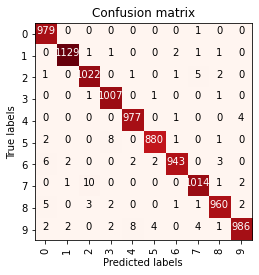

In [139]:
plot_confusion_matrix(confusion_matrix(y_test, predicted_classes), 
                      np.unique(y_test).tolist())

there's 10 values predicted as 2, but shown as 7, we'll take a look.

In [141]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [144]:
incorrect_s = []
for incorrect in incorrect_num:
    if predicted_classes[incorrect] == 2:
        incorrect_s.append(incorrect)

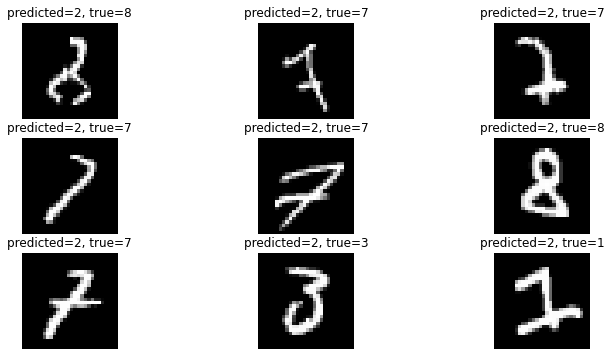

In [149]:
# looking at some incorrect examples (predicted as 2 incorrectly)
plt.figure(figsize=(12,6))
for i, incorrect in enumerate(incorrect_s[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("predicted={}, true={}".format(predicted_classes[incorrect], 
                                             y_test[incorrect]))
    plt.axis("off")

#### 8. Conclusion

CNN is the best model to use, accuracy near 0.99.

we can GridSearchCV to try out best combination of optimizer, dense_layer_sizes, filters, kernel_size and pool_size, with more wider range for tuning, but this will consume much more time. <br>
there's other ways of better tuning, using kerastuner and bayesian optimization.